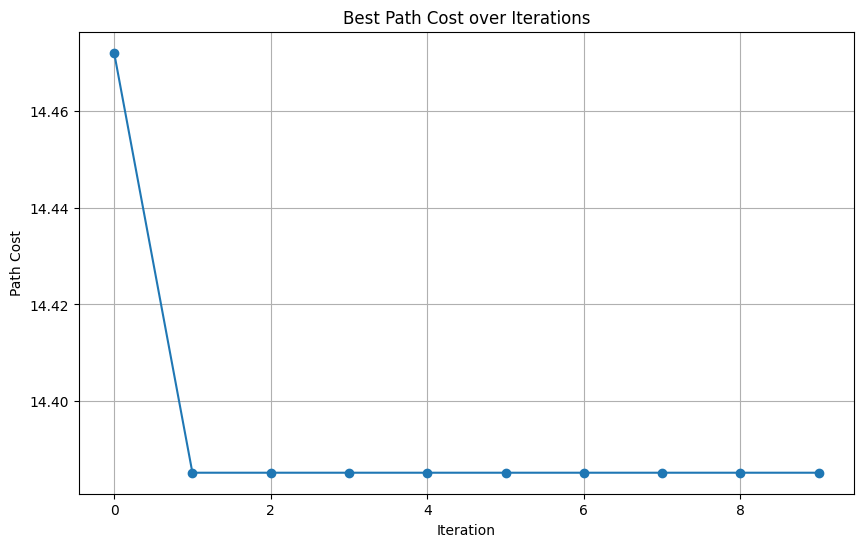

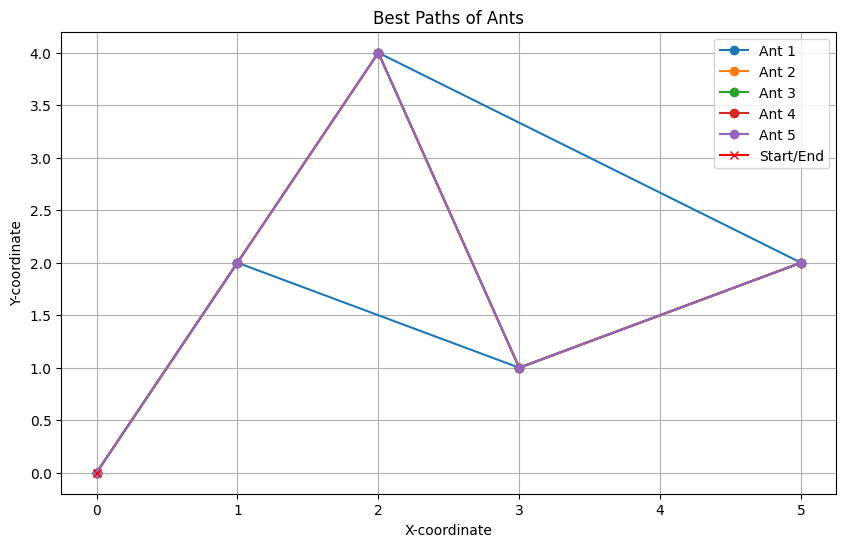

Best Path: [1. 2. 4. 3. 5. 1.]
Best Path Cost: 9


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate distance between cities
def calculate_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

# Ant Colony Optimization algorithm with visualizations
def ant_colony_optimization(iteration, n_ants, n_cities, cities):
    m = n_ants
    n = n_cities
    e = 0.5  # Evaporation rate
    alpha = 1  # Pheromone factor
    beta = 2  # Visibility factor

    # Calculate distances between cities
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distances[i, j] = calculate_distance(cities[i], cities[j])

    # Calculate visibility (inverse of distances)
    visibility = 1 / (distances + 1e-10)  # Adding a small value to avoid divide by zero

    # Initialize pheromone matrix
    pheromone = 0.1 * np.ones((n, n))

    # Initialize route matrix for ants
    routes = np.ones((m, n + 1))

    # Variables to store information for visualization
    best_path_costs = []
    best_paths = []

    # Main loop for iterations
    for _ in range(iteration):
        routes[:, 0] = 1  # Initial starting and ending position of every ant is '1'

        # Move each ant to the next city
        for i in range(m):
            temp_visibility = np.array(visibility)

            for j in range(n - 1):
                cur_loc = int(routes[i, j] - 1)
                temp_visibility[:, cur_loc] = 0

                p_feature = np.power(pheromone[cur_loc, :], beta)
                v_feature = np.power(temp_visibility[cur_loc, :], alpha)

                p_feature = p_feature[:, np.newaxis]
                v_feature = v_feature[:, np.newaxis]

                combine_feature = np.multiply(p_feature, v_feature)

                total = np.sum(combine_feature)
                probs = combine_feature / total
                cum_prob = np.cumsum(probs)

                r = np.random.random_sample()
                city = np.nonzero(cum_prob > r)[0][0] + 1

                routes[i, j + 1] = city

            left = list(set(range(1, n + 1)) - set(routes[i, :-2]))[0]
            routes[i, -2] = left

        # Calculate total distance for each ant's route
        dist_cost = np.zeros((m, 1))
        for i in range(m):
            s = 0
            for j in range(n - 1):
                s += distances[int(routes[i, j]) - 1, int(routes[i, j + 1]) - 1]
            dist_cost[i] = s

        # Find the best route and update pheromone
        dist_min_loc = np.argmin(dist_cost)
        dist_min_cost = dist_cost[dist_min_loc]
        best_route = routes[dist_min_loc, :]

        pheromone = (1 - e) * pheromone
        for i in range(m):
            for j in range(n - 1):
                dt = 1 / dist_cost[i]
                pheromone[int(routes[i, j]) - 1, int(routes[i, j + 1]) - 1] += dt

        # Store information for visualization
        best_path_costs.append(int(dist_min_cost[0]) + distances[int(best_route[-2]) - 1, 0])
        best_paths.append(np.array(best_route, dtype=int))

    # Visualizations
    # Plotting the best path costs over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(best_path_costs, marker='o')
    plt.title('Best Path Cost over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Path Cost')
    plt.grid(True)
    plt.show()

    # Plotting the best path on the graph
    plt.figure(figsize=(10, 6))
    best_paths_array = np.array(best_paths)
    for i in range(m):
        plt.plot(
            cities[best_paths_array[i, :-1] - 1, 0], cities[best_paths_array[i, :-1] - 1, 1],
            marker='o', label=f'Ant {i + 1}'
        )
    plt.plot(cities[0, 0], cities[0, 1], marker='x', color='red', label='Start/End')
    plt.title('Best Paths of Ants')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_route, int(dist_min_cost[0])

# Example usage
iteration = 10
n_ants = 5
n_cities = 5

# Example cities (replace with your own coordinates)
cities_coordinates = np.array([[0, 0], [1, 2], [3, 1], [2, 4], [5, 2]])

best_path, best_path_cost = ant_colony_optimization(iteration, n_ants, n_cities, cities_coordinates)

print('Best Path:', best_path)
print('Best Path Cost:', best_path_cost)
